#　第４章形態素解析

#吾輩は猫であるの文章を取得  
!wget https://nlp100.github.io/data/neko.txt

以下を実行しmecabで吾輩は猫であるの文章を形態素解析  
javaのエラーが生じるので，形態素解析のプロセスはgoogle colabで実行した．  
!apt install mecab libmecab-dev mecab-ipadic-utf8  
!mecab -o ./neko.txt.mecab ./neko.txt

In [4]:
#形態素解析後の行数を確認
!wc -l .//neko.txt.mecab

  226266 ./neko.txt.mecab


In [7]:
#先頭20行出力
!head -20 ./neko.txt.mecab

一	名詞,数,*,*,*,*,一,イチ,イチ
	記号,一般,*,*,*,*,*
EOS
	記号,一般,*,*,*,*,*
EOS
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。
	記号,一般,*,*,*,*,*
EOS
名前	名詞,一般,*,*,*,*,名前,ナマエ,ナマエ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
まだ	副詞,助詞類接続,*,*,*,*,まだ,マダ,マダ
無い	形容詞,自立,*,*,形容詞・アウオ段,基本形,無い,ナイ,ナイ
。	記号,句点,*,*,*,*,。,。,。
	記号,一般,*,*,*,*,*


EOS(End Of Sentence)以外は各種情報が揃っている．  
表層形と情報の間はタブで区切られている．  
品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,基本形,読み,発音　　
の順で表示されている．

In [37]:
import matplotlib.pyplot as plt
import japanize_matplotlib

### 問題30

形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [9]:
filename = './neko.txt.mecab'
morphemes = [] #各単語の形態素情報を保存する
sentences = []
with open(filename, 'r') as f:
    for line in f:
        if line != 'EOS\n':
            content = line.split('\t') #タブで単語と情報を分割
            if len(content) != 2 or content[0] == '':#関係ない要素を除去
                continue
            else:
                info = content[1].split(',')
                morpheme = {'surface': content[0], 'base': info[6], 'pos': info[0], 'pos1': info[1]}
                morphemes.append(morpheme)
        else:
            #EOS(文末)でここまでの形態素情報を1文として保存し，形態素情報を初期化
            sentences.append(morphemes)
            morphemes = []        

In [10]:
#最初の3文の形態素情報を表示
for i in range(3):
    print(sentences[i])

[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'}]
[]
[{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}, {'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}, {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}, {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}, {'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}, {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}]


章タイトル(一), 空行, 「吾輩は猫である．」の部分の情報が得られた．

### 問題31

動詞の表層系をすべて抽出せよ．

In [13]:
#被りを無くしたいので集合で実現
verbs_surface = set()
for sentence in sentences:
    for morpheme in sentence:
        if morpheme['pos'] == '動詞':
            verbs_surface.add(morpheme['surface'])

In [16]:
#動詞の表層形の種類数と15例を出力
print(len(verbs_surface))
print(list(verbs_surface)[:15])

3893
['負ける', '折れ', '拾う', '呈し', '作る', '出よ', 'かかり', '観る', '越せ', 'へい', '脱が', '痛み', '沿う', '向け', '食える']


### 問題32

動詞の基本形をすべて抽出せよ

In [17]:
verbs_base = set()
for sentence in sentences:
    for morpheme in sentence:
        if morpheme['pos'] == '動詞':
            verbs_base.add(morpheme['base'])

In [18]:
print(len(verbs_base))
print(list(verbs_base)[:15])

2300
['つとめる', '負ける', '拾う', '作る', 'さばける', '観る', '睨む', '沿う', '食える', '背く', '分つ', 'あきれる', '組み合せる', '示す', '論ずる']


### 問題33  
2つの名詞が[の]で連結されている名詞句を抽出せよ．

In [19]:
noun_phrases = set()
for sentence in sentences:
    for i in range(1, len(sentence)-1):
        if sentence[i-1]['pos'] == '名詞' and sentence[i]['surface'] == 'の' and sentence[i+1]['pos'] == '名詞':
            noun_phrase = sentence[i-1]['surface'] + 'の' + sentence[i+1]['surface']
            noun_phrases.add(noun_phrase)

In [20]:
print(len(noun_phrases))
print(list(noun_phrases)[:10])

4924
['名前の独', '行水の女', '人の声', '畳の上', 'つもりのところ', '吾輩の関知', '檜の方', '最初のうち', '演説の続き', '子の声']


### 問題34  
名詞の連接(連続して出現する名詞)を最長一致で抽出せよ

In [26]:
noun_connections = set()
for sentence in sentences:
    noun_connection = ''
    count = 0 #連接の数をカウント
    for morpheme in sentence:
        if morpheme['pos'] == '名詞':
            noun_connection += morpheme['surface']
            count += 1
        elif count >= 2:
            noun_connections.add(noun_connection)
            noun_connection = ''
            count = 0
        else:
            noun_connection = ''
            count = 0
    if count >= 2:
        noun_connections.add(noun_connection) #文末が名詞だった場合の対処       

In [27]:
print(len(noun_connections))
print(list(noun_connections)[:10])

4457
['提灯玉', '当人自身', '赤毛布', 'ハハハハハ不埒', '富時', '生徒さん', '半毛', '一番手頃', '阿部さん', '甲割']


### 問題35  
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ

In [29]:
#初期化作業を単純化するためdefaultdictを使用
from collections import defaultdict

words_and_freq = defaultdict(int) #valueは頻度なのでintで初期化
for sentence in sentences:
    for morpheme in sentence:
        if morpheme['pos'] != '記号': #記号は単語じゃないから除去
            words_and_freq[morpheme['base']] += 1 #基本形で計上
words_and_freq = sorted(words_and_freq.items(), key=lambda x: x[1], reverse=True) #valueでソート，降順にする．         

In [30]:
print(len(words_and_freq))
print(words_and_freq[:10])

11225
[('の', 9194), ('て', 6848), ('は', 6420), ('に', 6243), ('を', 6071), ('だ', 5972), ('と', 5508), ('が', 5337), ('た', 4267), ('する', 3657)]


### 問題36
出現頻度が高い１０語とその出現頻度をグラフで表示せよ

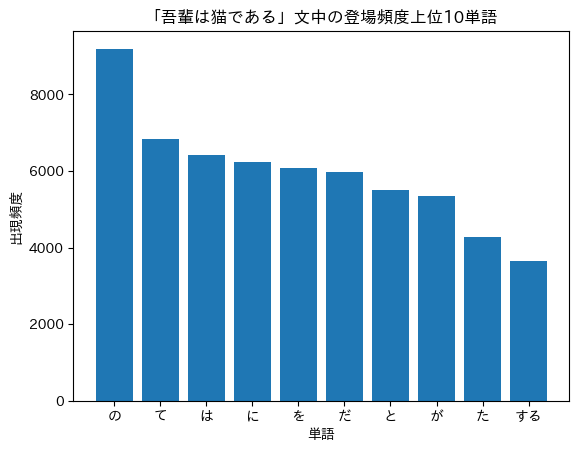

In [36]:
#35で出力した10語の頻度を可視化
left = [word_and_freq[0] for word_and_freq in words_and_freq[:10]]
height = [word_and_freq[1] for word_and_freq in words_and_freq[:10]]
plt.bar(left, height)
plt.xlabel('単語')
plt.ylabel('出現頻度')
plt.title('「吾輩は猫である」文中の登場頻度上位10単語')
plt.show()

### 問題37  
『猫』とよく共起(猫の登場する文中に登場)する10語とその出現頻度をグラフで表示せよ

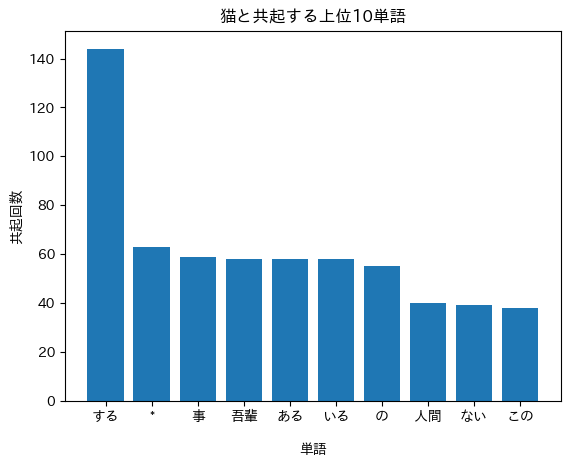

In [91]:
words_with_cat = defaultdict(int)
for sentence in sentences:
    if '猫' in [morpheme['surface'] for morpheme in sentence]:
        for morpheme in sentence:
            if morpheme['pos'] not in ['記号', '助詞', '助動詞']:
                words_with_cat[morpheme['base']] += 1
del words_with_cat['猫'] #猫が一番多くなるのは当然なので除去
words_with_cat = sorted(words_with_cat.items(), key=lambda x:x[1], reverse=True)

left = [word[0] for word in words_with_cat[:10]]
height = [word[1] for word in words_with_cat[:10]]
plt.bar(left, height)
plt.xlabel('単語')
plt.ylabel('共起回数')
plt.title('猫と共起する上位10単語')
plt.show()

### 問題38  
単語の出現頻度のヒストグラムをかけ．ただし，横軸は出現頻度を表し，1から単語の出現頻度の最大値までの線形目盛とする．縦軸はx軸で示される出現頻度となった単語の異なり数である．

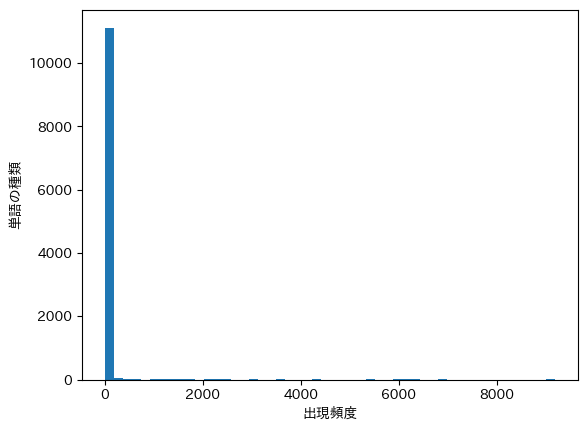

In [48]:
from numpy import log2

freqs = [word_and_freq[1] for word_and_freq in words_and_freq] #出現頻度のみ取得
k = 1 + log2(len(freqs)) #スタージェスの公式により規定
bins = int((freqs[0] - freqs[-1]) / k)
plt.hist(freqs, bins=50)#binsをスタージェスの公式によるもの(635)にすると，低頻度方向に偏りが大きすぎたので50に変更
plt.xlabel('出現頻度')
plt.ylabel('単語の種類')
plt.show()

### 問題39 zipf'low
単語の出現頻度順位を縦軸，その出現頻度を縦軸として両対数グラフをプロットせよ．

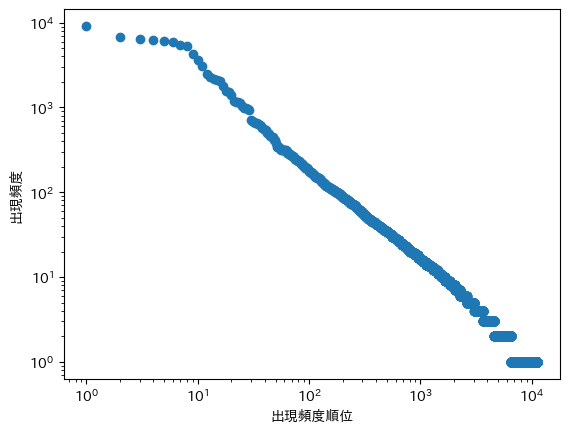

In [49]:
rank = [r+1 for r in range(len(freqs))]
plt.scatter(rank, freqs)
plt.xscale('log') #対数表示
plt.yscale('log') #対数表示
plt.xlabel('出現頻度順位')
plt.ylabel('出現頻度')
plt.show()

zipfの法則では単語xの出現頻度f_xと出現頻度順位r_xは反比例するとされる．
$$ f_x = \frac{C_0}{r_x} $$  
従って両対数グラフでは  
$$ log(f_x) = C_1 - log(r_x) $$  
と右肩下がりの直線的な傾向になる

### 追加検討 TF-IDF

$$ TF-IDF = TF(x, d)log\frac{N}{DF(x)} $$

In [78]:
#初期化作業を単純化するためdefaultdictを使用
#助詞と助動詞は除去
from collections import defaultdict

TF = defaultdict(int) #valueは頻度なのでintで初期化
for sentence in sentences:
    for morpheme in sentence:
        if morpheme['pos'] not in ['記号', '助詞', '助動詞']: 
            TF[morpheme['base']] += 1 #基本形で計上
            
DF = defaultdict(int)
for sentence in sentences:
    words_in_sentence = set([morpheme['base'] for morpheme in sentence])
    for morpheme in sentence:
        if morpheme['base'] in words_in_sentence and morpheme['pos'] not in ['記号', '助詞', '助動詞']:
            DF[morpheme['base']] += 1
            words_in_sentence.remove(morpheme['base'])

In [86]:
words_in_TF = list(TF.keys())
words_in_DF = list(DF.keys())
print(len(words_in_TF), len(words_in_DF))

11122 11122


In [80]:
tf_idf = defaultdict(int)
N = len(sentences)
for word in words_in_TF:
    a = TF[word] * np.log(N / DF[word])
    tf_idf[word] = int(a)

In [81]:
tf_idf = sorted(tf_idf.items(), key=lambda x: x[1], reverse=True)

In [85]:
for i in range(10):
    print(tf_idf[i][0], end='/')

する/*
/いる/の/云う/事/なる/ある/君/ない/

あんまり特徴が反映されていない．．．
ストップワードの除去等が必要か